# Ecuaciones diferenciales ordinarias con valoes iniciales.

## Método de Euler 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import pylab as pl 
from scipy.interpolate import interp1d 

Resolveremos una ecuación de la forma:
\begin{equation}
\frac{dy}{dt} = f(t,y)
\end{equation}

con condición inicial:
\begin{equation}
y(a) = \alpha \quad con \quad a<t<b
\end{equation}

Resolvemos la ecuación de Friedmann :
\begin{equation}
\frac{1}{a}\frac{da}{dt} = H_0 \left[ \frac{\Omega_m}{a^3} + \frac{\Omega_{\rho}}{a^4} + \Omega_{\Delta} \right]^{1/2}
\end{equation}

Entonces, tenemos que:
\begin{equation}
f(a) = H_0 \left[ \frac{\Omega_m}{a} + \frac{\Omega_{\rho}}{a^2} + a^2\Omega_{\Delta} \right]^{1/2}
\end{equation}

Definimod una función para $f$

In [2]:
def f(y):
    omg_mo = 0.39
    omg_ro = 1.e-5
    omg_d = 1.-omg_mo-omg_ro
    G = 6.67e-11
    ro_0 = 1.e-26
    H_o = math.sqrt((8*math.pi*G*ro_0)/3)
    return H_o*((np.divide(omg_mo,y)+ np.divide(omg_ro,y**2) + (y**2)*omg_d))**0.5

Resolviendo usando el método de Euler:
seleccionamos un entero $N$ y los puntos $\{t_0, t_1, t_2, ... , t_N\}$ donde $t_i = a + ih$ para cada i = 0,1,2,...,N con:

\begin{equation}
 h = \frac{b-a}{N}
\end{equation}

La solución del problema de valor inicial será:

\begin{equation}
y(t_{i+1}) = y(t_i) + hy(t_i,y_i)
\end{equation}

In [3]:
n = 1000
t_1 = 13.6e9*np.pi*1.e7
a = t_1
b = 0.
h = (b-a)/n
t = np.linspace(a,b,n)
y_ini = 1.0
y = [y_ini]
for i in range(1,n):
        y.append(y[i-1] + (h*f(y[i-1])))

/usr/lib/python3/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in double_scalars
  


Comparamos la solución anterior con la solución a la ecuación de Friedmann resolviendo la integral:

\begin{equation}
\int_a^1\frac{da'}{a'\left( \frac{\Omega_{m0}}{a'^3} + \frac{\Omega_{r0}}{a'^4} +\Omega_{\Delta} \right)^{1/2}} = \int_t^{t_0} H_0 dt
\end{equation}


In [4]:
def simpson_com(y,x):
    n = len(x)
    a = np.min(x)
    b = np.max(x)
    h = (b-a)/n
    s_1 = []
    for i in range((int(n/2))-1):
        s_1.append(y[2*i])
    s_2 = []
    for i in range((int(n/2))):
        s_2.append(y[2*i-1])
    return (h/3)*(y[0]+y[n-1] + 2*np.sum(s_1) + 4*np.sum(s_2))  

In [5]:
n = 1000

a = np.linspace(0.00000001,1,n)
omg_mo = 0.39
omg_ro = 1.e-5
omg_d = 1.-omg_mo-omg_ro
G = 6.67e-11
ro_0 = 1.e-26
H_o = math.sqrt((8*math.pi*G*ro_0)/3)
t_1 = 13.6e9*np.pi*1.e7
F_simp = []
for i in range(len(a)):
    x = np.linspace(a[i],np.max(a),10000)
    F_simp.append(simpson_com(np.power(np.divide(1,np.divide(omg_mo,x)\
                                            + np.divide(omg_ro,np.power(x,2))\
                                            + x**2*omg_d),1/2),x))
t_simp = t_1 - (np.divide(F_simp,H_o))

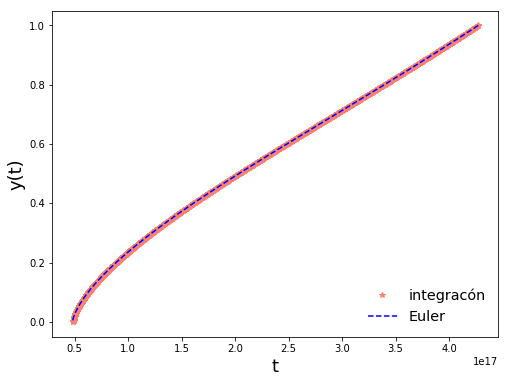

In [6]:
plt.figure(figsize=(8,6))
plt.plot(t_simp,a,'*',color = 'salmon', label='integracón')
plt.plot(t,y,'--b', label='Euler')
plt.xlabel('t',fontsize=18)
plt.ylabel('y(t)',fontsize=18)
plt.legend(loc='lower right', shadow=True, frameon = False , fontsize='x-large')